In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pickle 

df2 = pd.read_csv("20221031_table_dfPoolMLCCA.csv", sep=";")



with open('20221112_table_feature_matrix.csv', 'rb') as f:
    df = pickle.load(f)

print(df.columns)

target = df2["gravGrp_2_34"]

data = df



X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)




Index(['choc_cote', 'ageMeanConductors', 'nbVeh', 'prof_2.0', 'prof_3.0',
       'planGrp_1.0', 'surf_2.0', 'surf_8.0', 'atm_2.0', 'atm_3.0', 'atm_5.0',
       'atm_7.0', 'atm_8.0', 'vospGrp_1.0', 'catv_EPD_exist_1',
       'catv_PL_exist_1', 'trajet_coursesPromenade_conductor_1',
       'sexe_male_conductor_1', 'sexe_female_conductor_1',
       'intGrp_Croisement circulaire', 'intGrp_Croisement de deux routes',
       'intGrp_Hors intersection', 'intGrp_Passage à niveau',
       'catv_train_exist_1', 'infra_3.0', 'infra_5.0', 'infra_7.0',
       'infra_9.0', 'catr_2.0', 'catr_3.0', 'catr_4.0', 'catr_9.0',
       'hourGrp_nuit', 'lum_2.0', 'lum_3.0', 'lum_5.0', 'circ_2.0', 'circ_3.0',
       'circ_4.0', 'nbvGrp_1', 'nbvGrp_2', 'nbvGrp_3', 'nbvGrp_4+',
       'catv_2_roues_exist_1', 'col_2.0', 'col_3.0', 'col_4.0', 'col_5.0',
       'col_6.0', 'col_7.0', 'obsGrp_Pas d'Obstacle', 'situ_2.0', 'situ_3.0',
       'situ_4.0', 'situ_6.0', 'situ_8.0', 'populationGrp_Grande Ville',
       'popu

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

41
29
['prof_3.0', 'surf_8.0', 'atm_3.0', 'atm_5.0', 'atm_8.0', 'vospGrp_1.0', 'intGrp_Passage à niveau', 'infra_7.0', 'infra_9.0', 'catr_9.0', 'lum_2.0', 'lum_5.0', 'circ_3.0', 'circ_4.0', 'nbvGrp_1', 'nbvGrp_2', 'col_5.0', 'col_6.0', 'situ_2.0', 'situ_6.0', 'situ_8.0', 'mois_label_dec', 'mois_label_fev', 'mois_label_jan', 'mois_label_jul', 'mois_label_mar', 'mois_label_oct', 'etatpGrp_pieton_alone_1', 'locpGrp_pieton_3_1']


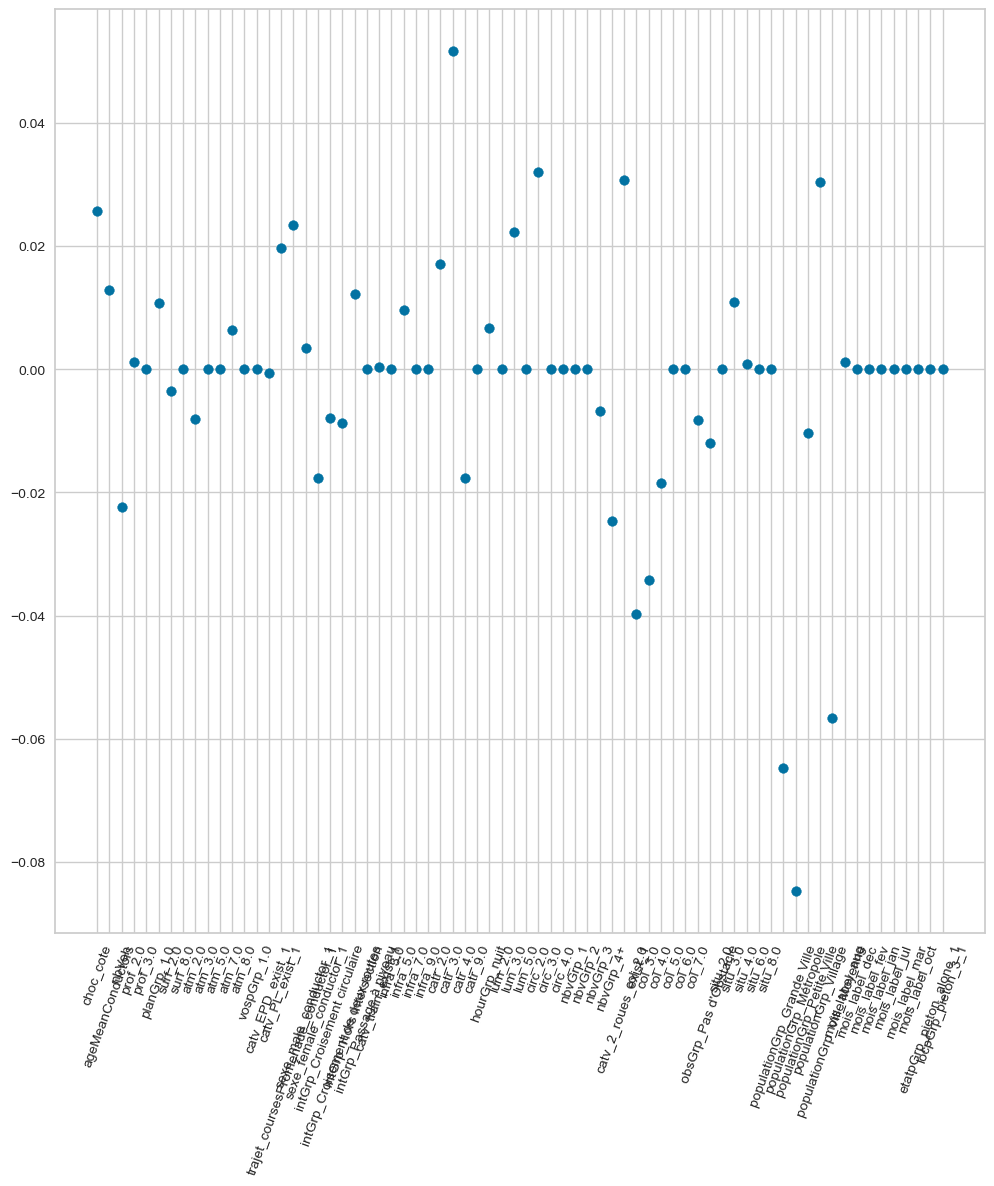

In [21]:
# Pour faire de la sélection de variable, on fait une régression Lasso
from sklearn.linear_model import Lasso 

lasso_r = Lasso(alpha = 0.005)
lasso_r.fit(X_train_scaled, y_train)

fig = plt.figure(figsize = (12,12))
plt.scatter(data.columns, lasso_r.coef_) ;
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);



liste_colonnes = []
liste_colonnes_bis = []

for i,elem in enumerate(data.columns) :
    if lasso_r.coef_[i] != 0 :
        liste_colonnes.append(elem)
    if lasso_r.coef_[i] == 0 :
        liste_colonnes_bis.append(elem)


print(len(liste_colonnes))
print(len(liste_colonnes_bis))
        
print(liste_colonnes_bis)



In [11]:
#X_train_sel = X_train[liste_colonnes]
#X_test_sel = X_test[liste_colonnes]
X_train_sel = X_train_scaled
X_test_sel = X_test_scaled

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state = 321, max_depth=9)
rf.fit(X_train_sel, y_train)
y_pred = rf.predict(X_test_sel)

display(pd.crosstab(y_test, y_pred, rownames = ['Classes Réelles'], colnames = ['Classes Prédites']))
print(rf.score(X_train_sel, y_train))
print(rf.score(X_test_sel, y_test))


Classes Prédites,0,1
Classes Réelles,,
0,83755,12781
1,33734,37041


0.7227221244333141
0.7219848067371542


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(X_train_sel.shape)
print(X_test_sel.shape)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78     96536
           1       0.74      0.52      0.61     70775

    accuracy                           0.72    167311
   macro avg       0.73      0.70      0.70    167311
weighted avg       0.73      0.72      0.71    167311

(669242, 70)
(167311, 70)


In [ ]:
# Importing FeatureImportances visualizer
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

# Creating the feature importances plot
visualizer = FeatureImportances(rf,relative = False,
                                absolute=True,is_fitted=True)

visualizer.fit(X_train_sel, y_train)

# Saving plot in PNG format
visualizer.show(outpath="Feature_Importances_Plot.png",)


<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

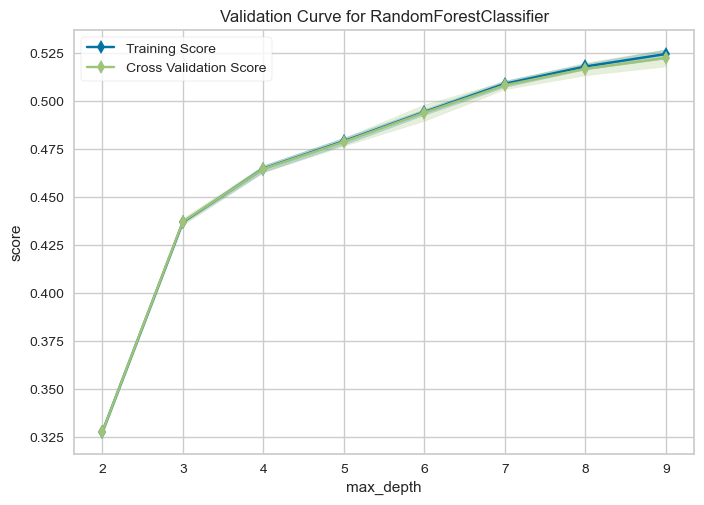

In [20]:
from yellowbrick.model_selection import ValidationCurve
import numpy as np
visualizer = ValidationCurve(RandomForestClassifier(random_state=321), 
                             param_name="max_depth", n_jobs=-1,
                             param_range=np.arange(2, 10, 1), 
                             cv=5, scoring="recall")

visualizer.fit(X_train_sel, y_train)

# Saving plot in PNG format
visualizer.show(outpath="Validation_Curve.png")


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold

rf_optim = RandomForestClassifier (random_state=22)

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                    'max_depth': np.arange(5,25,5),
                    'min_samples_leaf': [1, 3, 5],                   
                    'max_features': ['sqrt', 'log2']}]

grid_cv = GridSearchCV(rf_optim,param_grid = param_grid_rf,cv=5, refit=True)
# Insérez votre code ici
grid_cv.fit(X_train_sel, y_train)

print(grid_cv.best_params_)
print(grid_cv.score(X_train_sel, y_train))
print(grid_cv.score(X_test_sel, y_test))


NameError: name 'LogisticRegressionClassifier' is not defined

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Recall

print(X_train_sel.shape)

inputs = Input(shape = (70), name = 'Input')
dense1 = Dense(units=48, activation = 'tanh', name = "Couche_1")
dense2 = Dense(units=24, activation = 'tanh', name = "Couche_2")
dense3 = Dense(units=12, activation = 'tanh', name = "Couche_3")
dense4 = Dense(units=6, activation = 'tanh', name = "Couche_4")
dense5 = Dense(units=2, activation = 'softmax', name = "Couche_5")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
x = dense4(x)
outputs = dense5(x)
model = Model(inputs = inputs, outputs = outputs)
model.summary()
model.compile(loss =  "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])



(669242, 70)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 70)]              0         
                                                                 
 Couche_1 (Dense)            (None, 48)                3408      
                                                                 
 Couche_2 (Dense)            (None, 24)                1176      
                                                                 
 Couche_3 (Dense)            (None, 12)                300       
                                                                 
 Couche_4 (Dense)            (None, 6)                 78        
                                                                 
 Couche_5 (Dense)            (None, 2)                 14        
                                                                 
Total params: 4,976
Trainable params: 4,976
No

In [17]:
model.fit(X_train_sel, y_train, epochs = 100, batch_size = 500, validation_split = 0.2)


Epoch 1/100
1071/1071 [==============================] - 7s 5ms/step - loss: 0.5587 - accuracy: 0.7240 - val_loss: 0.5505 - val_accuracy: 0.7299
Epoch 2/100
1071/1071 [==============================] - 4s 4ms/step - loss: 0.5470 - accuracy: 0.7324 - val_loss: 0.5463 - val_accuracy: 0.7335
Epoch 3/100
1071/1071 [==============================] - 6s 5ms/step - loss: 0.5437 - accuracy: 0.7354 - val_loss: 0.5440 - val_accuracy: 0.7344
Epoch 4/100
1071/1071 [==============================] - 4s 4ms/step - loss: 0.5419 - accuracy: 0.7360 - val_loss: 0.5437 - val_accuracy: 0.7343
Epoch 5/100
1071/1071 [==============================] - 4s 3ms/step - loss: 0.5406 - accuracy: 0.7370 - val_loss: 0.5428 - val_accuracy: 0.7349
Epoch 6/100
1071/1071 [==============================] - 3s 3ms/step - loss: 0.5398 - accuracy: 0.7375 - val_loss: 0.5432 - val_accuracy: 0.7348
Epoch 7/100
1071/1071 [==============================] - 4s 4ms/step - loss: 0.5391 - accuracy: 0.7376 - val_loss: 0.5421 - val_ac

In [18]:
test_pred = model.predict(X_test_sel)
y_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test
from sklearn.metrics import classification_report 
print(classification_report(y_test_class, y_pred_class))

display(pd.crosstab(y_test_class, y_pred_class, rownames = ['Classes Réelles'], colnames = ['Classes Prédites']))

5229/5229 [==============================] - 8s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.84      0.78     96536
           1       0.72      0.59      0.65     70775

    accuracy                           0.73    167311
   macro avg       0.73      0.71      0.72    167311
weighted avg       0.73      0.73      0.73    167311



Classes Prédites,0,1
Classes Réelles,,
0,80654,15882
1,29012,41763


In [ ]:
# AUC sur MLP

# Sortir liste des features avec coef en valeur absolue 

# Préparer 